<a href="https://colab.research.google.com/github/DanB1421/DanB1421/blob/main/assignment_05/assignment_05_part_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05: Part 6- Data Cleaning

- Name: Daniel Brilliant
- Date: 03/04/2022

## **Handling Missing Data with Pandas**

Pandas borrows all capabilities from numpy selection and adds a number of convenient methods to handle missing values

In [ ]:
import numpy as np
import pandas as pd

### **Pandas utility functions**

Similarly to numpy, pandas also has a few utility functions to identify and detect null values:

In [ ]:
pd.isnull(np.nan)

True

In [ ]:
pd.isnull(None)

True

In [ ]:
pd.isna(np.nan)

True

In [ ]:
pd.isna(None)

True

Opposites exist:

In [ ]:
pd.notnull(None)

False

In [ ]:
pd.notnull(np.nan)

False

In [ ]:
pd.notna(np.nan)

False

In [ ]:
pd.notnull(3)

True

These work with Series and DataFrames:

In [ ]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [ ]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [ ]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


### **Pandas Operations with Missing Values**

Pandas manages missing values more easily than numpy. nans will no longer behave as 'viruses' and operations will just ignore them.

In [ ]:
pd.Series([1, 2, np.nan]).count()

2

In [ ]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [ ]:
pd.Series([2, 2, np.nan]).mean()

2.0

### **Filtering missing data**

As seen with numpy, we can combine boolean selection and pd.isnull to filter out nans and null values:

In [ ]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [ ]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
pd.notnull(s).sum()

4

In [ ]:
pd.isnull(s).sum()

2

In [ ]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

Both notnull and isnull are also methods of Series and DataFrames, so we can use it that way:

In [ ]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

### **Dropping null values**

Boolean selection + notnull() seems a little bit verbose and repetitive. And as we said before: any repetitive task will probably have a better, more DRY way. In this case, we can use the dropna method:

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

### **Dropping null values on DataFrames**

You saw how simple it is to drop nas with a Series. But with DataFrames, there will be a few more things to consider, because you can't drop single values. You can only drop entire columns or rows. Let's start with a sample DataFrame: 

In [ ]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [ ]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.shape

(4, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [ ]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [ ]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

In [ ]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In this case we're dropping rows. Rows containing null values are dropped from the DF. You can also use the axis parameter to drop columns containing null values:

In [ ]:
df.dropna(axis=1)  # axis='columns' also works

,Column D
0,5
1,8
2,34
3,110


In this case, any row or column that contains at least one null value will be dropped. This can be controlled with how parameter. Can be either 'any' or 'all'

In [ ]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})

In [ ]:
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [ ]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.dropna(how='any')  # default behavior

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


You can also use the thresh parameter to indicate a threshold of non-null values for the row/column to be kept:

In [ ]:
df

In [ ]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [ ]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


### **Filling null values**

Sometimes instead of dropping the null values, we might need to replace them with other values. This highly depends on your context and the dataset you have. Sometimes a nan can be replaced with a 0, sometimes it can be replaced with the mean of the sample, and some other times you can take the closest value. Again, it depends on the context. We'll show you the different methods and mechanisms and you can then apply them to your own problem.

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

**Filling nulls with a arbitrary value**

In [ ]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [ ]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

**Filling nulls with contiguous (close) values**

The method argument is used to fill null values with other values close to that null:

In [ ]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [ ]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

This can still leave null values at the extremes of the series/dataframe:

In [ ]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [ ]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

**Filling null values on dataframes**

The fillna method works similarly on data frames. The main differences are that axes (rows or columns) can be specified to use to fill the values and more control is given on the values passed:

In [ ]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [ ]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [ ]:
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


### **Checking if there are NAs**

Does this series contain any missing value? The answer is True or False. How can this be verified?

**Example 1: Checking the length**

If values are missing, s.dropna() will have less elements than s:

In [ ]:
s.dropna().count()

In [ ]:
missing_values = len(s.dropna()) != len(s)
missing_values

There is also a count method that excludes nans from the result:

In [ ]:
len(s)

In [ ]:
s.count()

So we could just do:

In [ ]:
missing_values = s.count() != len(s)
missing_values

**More Pythonic solution any**

The methods any and all check if there are any True values in a series or if all the values are Trye. They work the same way as in Python:

In [ ]:
pd.Series([True, False, False]).any()

True

In [ ]:
pd.Series([True, False, False]).all()

False

In [ ]:
pd.Series([True, True, True]).all()

True

The isnull() method returned a Boolean Series with True values wherever there was a nan:

In [ ]:
s.isnull()

So we can use the any method with the boolean array returned:

In [ ]:
pd.Series([1, np.nan]).isnull().any()

In [ ]:
pd.Series([1, 2]).isnull().any()

In [ ]:
s.isnull().any()

A structer version would only check the values of the series:

In [ ]:
s.isnull().values

In [ ]:
s.isnull().values.any()

## **Cleaning not-null values**

After dealing with many datasets I can tell you that "missing data" is not such a big deal. The best thing that can happen is to clearly see values like np.nan. The only thing you need to do is just use methods like isnull and fillna/dropna and pandas will take care of the rest. But sometimes, invalid values are not just "missing data" (None or nan)

In [57]:
import numpy as np
import pandas as pd

In [58]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


The previous DataFrame doesn't have any "missing value", but clearly has invalid data. 290 doesn't seem like a valid age, and D and ? don't correspond with any known sex category. How can you clean these not-missing, but clearly invalid values then?

### **Finding Unique Values**

The first step to clean invalid values is to notice them, then identify them and finally handle them appropriately (remove them, replace them, etc). Usually, for a "categorical" type of field (like Sex, which only takes values of a discrete set ('M', 'F')), we analyze the variety of values present. For that, we use the unique() method:

In [59]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [60]:
df['Sex'].value_counts()


F    2
M    1
D    1
?    1
Name: Sex, dtype: int64

Values like 'D' or '?' immediately raise your attention. Now, what to do with them? Let's say you picked up the phone, called the survey company and they told you that 'D' was a typo and it should actually be F. You can use the replace function to replace these values:

In [61]:
df['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

It can accept a dictionary of values to replace. For example, they also told you that there might be a few 'N's, that should actually be 'M's:

In [62]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

If many columns need to be replaced, this can be done at a DataFrame level:

In [63]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In the previous example, I replaced 290 with 29 (assuming it was just an extra 0 entered at data-entry phase). But what if you'd like to remove all the extra 0s from the ages columns? (example, 150 > 15, 490 > 49).

The first step would be to just set the limit of the "not possible" age. Is it 100? 120? Let's say that anything above 100 isn't credible for our dataset. We can then combine boolean selection with the operation:

In [64]:
df[df['Age'] > 100]


,Sex,Age
3,D,290


And then divide by 10:

In [65]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10

In [66]:
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


### **Duplicates**

Checking duplicate values is extremely simple. It'll behave differently between Series and DataFrames. Let's start with Series. As an example, let's say we're throwing a fancy party and we're inviting Ambassadors from Europe. But can only invite one ambassador per country. This is our original list, and as you can see, both the UK and Germany have duplicated ambassadors:



In [68]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [69]:
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

Two most important methods to deal with duplicates are duplicated and drop_duplicates:

In [70]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In this case, duplicated didn't consider "Kim Darroch" the first instance of the UK or 'Peter Wittig' as duplicates. Tha's because by default the first occurrence is considered not-duplicate. This can be changed with the keep parameter:

In [71]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In this case, the first ambassadors are considered duplicates but the last values are not. They can all be marked duplicates with keep=False:

In [72]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

A similar method is drop_duplicates, which excludes the duplicates and also accepts keep:

In [73]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [74]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [75]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

**Duplicates in DataFrames**

Duplicates in a dataframe happen in rows. Two rows with the exact same values are considered duplicates:

In [76]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [77]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In the above DF, we clearly see that Kobe is duplicated, but he appears with two different positions. What does duplicated say?

In [78]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

Again, "duplicated" means "all column values should be duplicates". We can customize this with the subset parameter:

In [79]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

And the keep rules still apply:

In [80]:
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

drop_duplicates takes the same parameters:

In [ ]:
players.drop_duplicates()

In [ ]:
players.drop_duplicates(subset=['Name'])

In [ ]:
players.drop_duplicates(subset=['Name'], keep='last')

## **Text Handling**

Cleaning text can be hard. 99% of the time invalid text contains mistypes which are unpredictable and patternless. Fortunately it's not as common with data entry replaced with machines. Let's explore still"

### **Splitting Columns**

The result of a survey is loaded and this is what you get:

In [85]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [86]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


Single columns represent "year, sex, country, and number of chilren" but it's all grouped in the same column and separated by an underscore. This can be fixed with the pandas split function:

In [87]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [88]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [89]:
df = df['Data'].str.split('_', expand=True)

In [90]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

You can also check which columns contain a given value with the contains method:

In [91]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [92]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

contains takes a regex/pattern as a first value, so the ? symnol needs to bne escaped as it has a special meaning for the patterns. Regular letters dont need escaping:

In [93]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

Removing blank spaces can be achieved with strip or replace:

In [94]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [95]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

As said, replace and contains take regex patterns, which make replacing values in bulk easier:

In [96]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

All of these are applied over a string attribute of a series.

## **More Visualizations**

We saw an overview of pandas plotting and how to use basic API of matplotlib. More details are provided here.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### **Global API**

Matplotlib's default pyplot API has a global MATLAB-style interface, as previously seen:

In [98]:
x = np.arange(-10, 11)

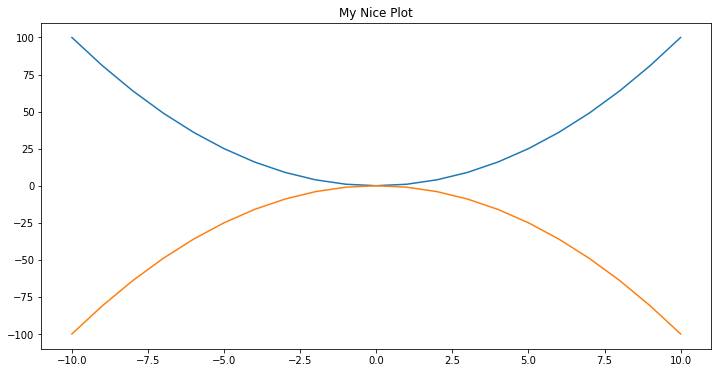

In [99]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

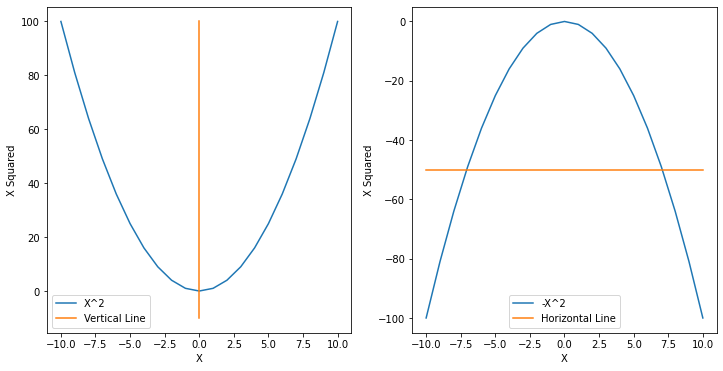

In [100]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

### **OOP Interface**

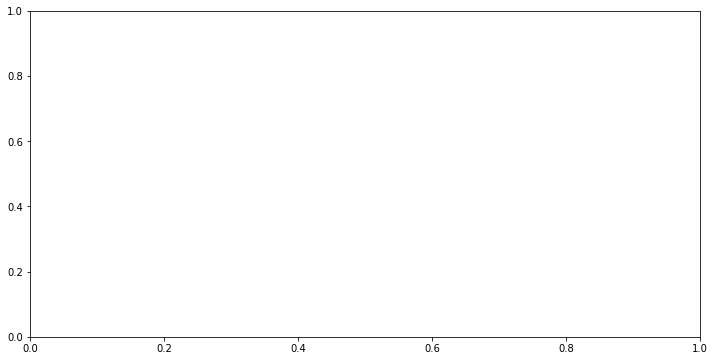

In [101]:
fig, axes = plt.subplots(figsize=(12, 6))

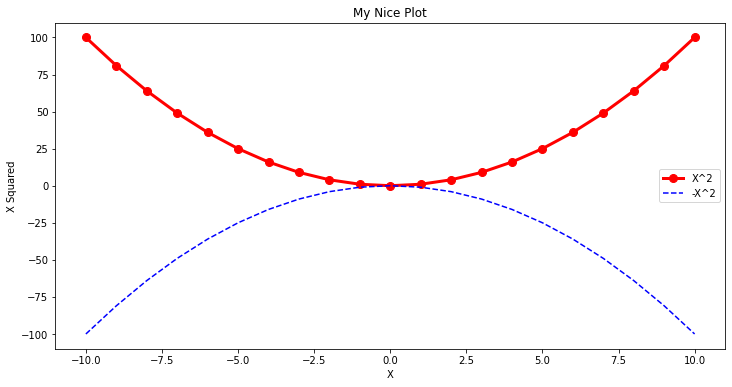

In [102]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

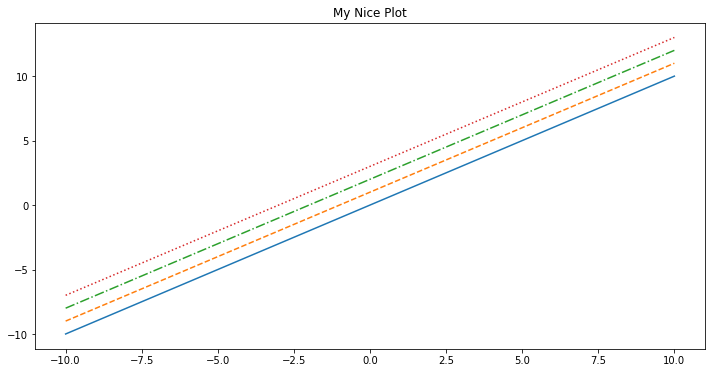

In [103]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

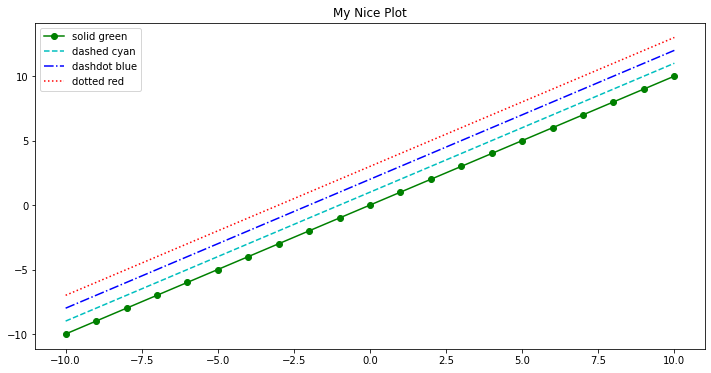

In [104]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

There are a lot of line and marker types.

In [ ]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

In [ ]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

### **Other types of plots**

#### **Figures and subfigures**

When we call the subplots() function we get a tuple with a figure and axes element

In [ ]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

We can also define how many elements we want inside the figure. This can be set with the nrows and ncols parameters:

(<Figure size 1008x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd453d16c50>,
       dtype=object))

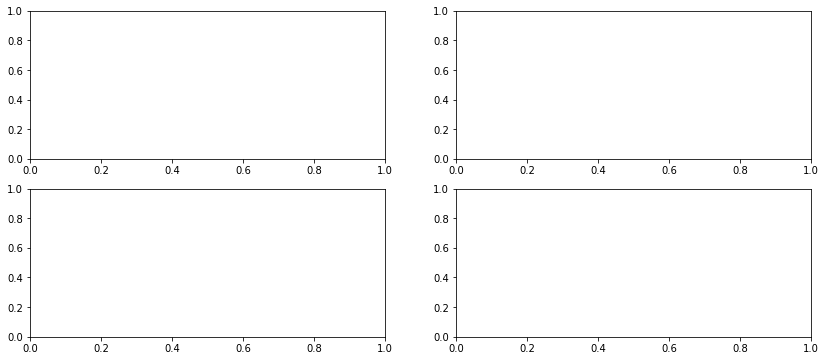

In [105]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

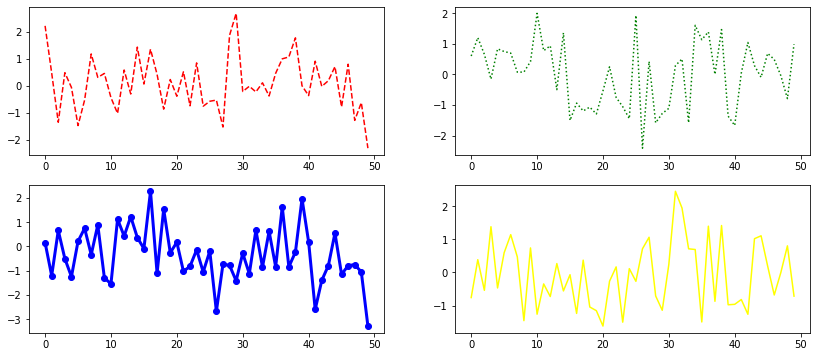

In [106]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

#### **The subplot2grid command**

There is another way to make subplots in a gridlike format:

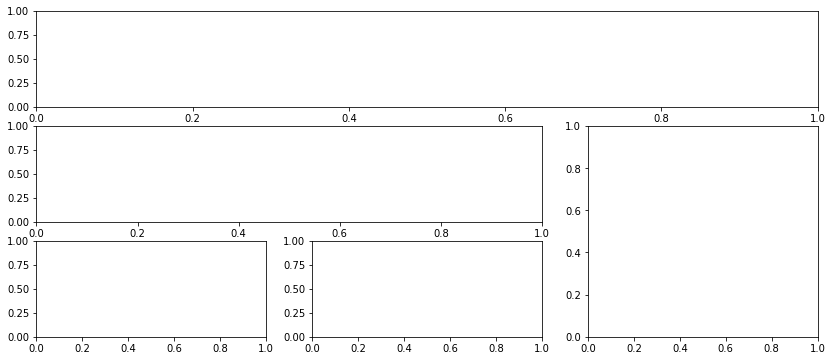

In [107]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

#### **Scatter Plot**

In [108]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

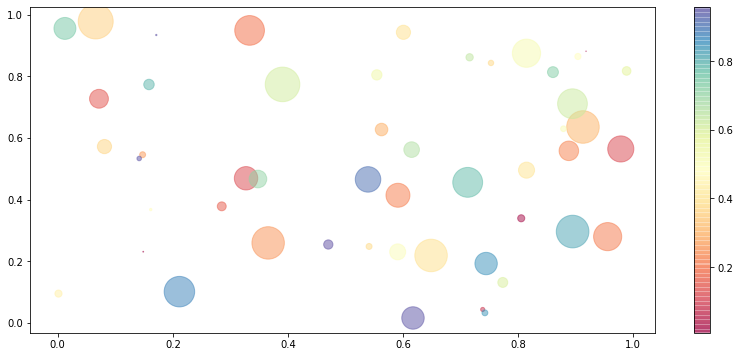

In [109]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

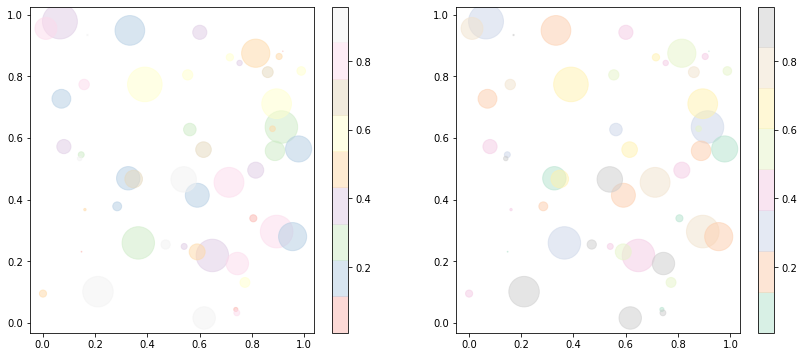

In [110]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

#### **Histograms**

In [111]:
values = np.random.randn(1000)

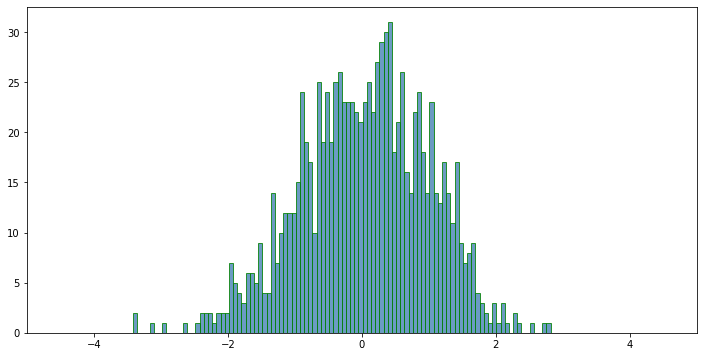

In [112]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [113]:
fig.savefig('hist.png')

#### **KDE (kernel density estimation)**

In [114]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

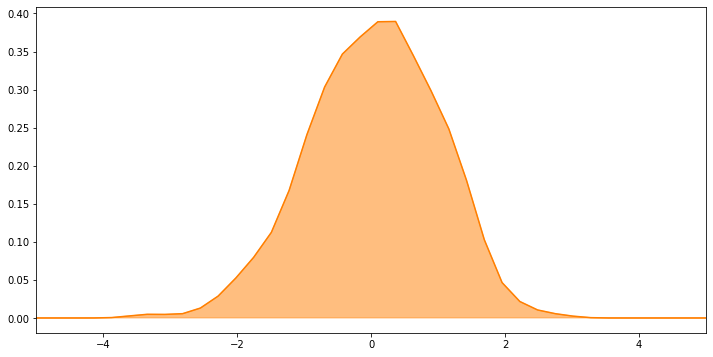

In [115]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

#### **Combine plots**

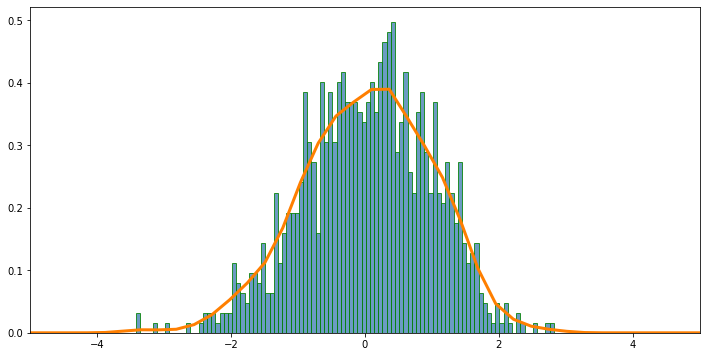

In [116]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

#### **Bar plots**

In [117]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

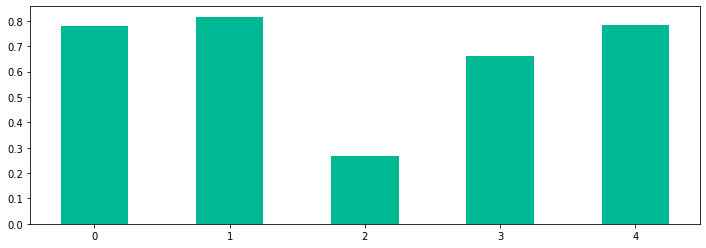

In [118]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

Also can be stacked bars, and include a legend:

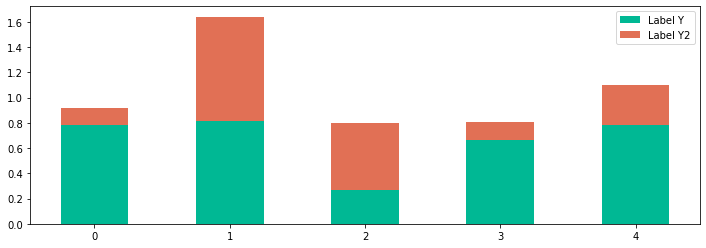

In [119]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

#### **Boxplots and outlier detection**

In [120]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 7., 3., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <a list of 10 Patch objects>)

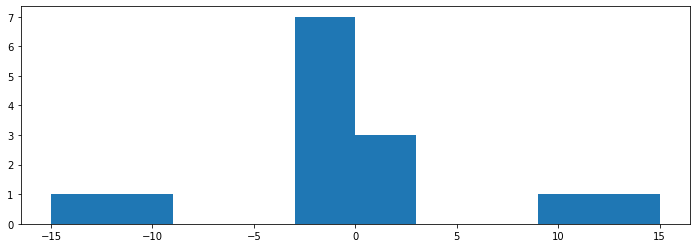

In [121]:
plt.figure(figsize=(12, 4))

plt.hist(values)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd4512c8390>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd45137dc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd45138ec90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd45138e710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd45137d150>,
  <matplotlib.lines.Line2D at 0x7fd45137d710>]}

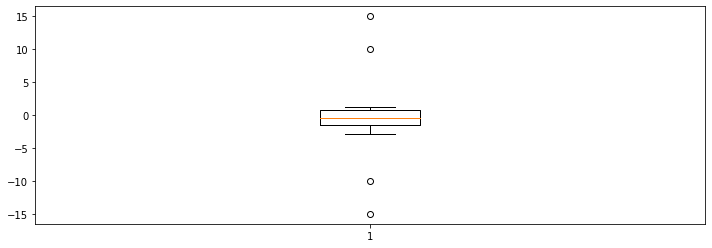

In [122]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)